In [9]:



from petrel_well_file_readers import *
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [41]:
folder=r"D:\Ameyem\D11\Data\\"
def readrows(f,line):
    pat='[+-]?([0-9]*[.])?[0-9]+'
    allvals=[]
    while line:
        vals_str= quoteparse(line)
        vals=[]
        for val in vals_str:
            if re.match(pat,val):
                vals.append(float(val))
            else:
                vals.append(val)
#         print(len(vals),len(allvals[0]))
        if len(allvals)==0:
            allvals.append(vals)
        else:
#             print(len(vals),len(allvals[0]))
            if len(vals)==len(allvals[0]):
                allvals.append(vals)
            else:
                print('There is problem in file format please cross check wiith result')
        line=f.readline()
    return np.array(allvals)
def read2cols(file,colnames=['X','Y'],nlines2skip=0 ):
# colnames=['X','Y']  
    with open(file) as f:        
        line='f.readline() '    
        for i in range(nlines2skip):
            line=f.readline()  
        while line:
            line=f.readline()
            values=readrows(f,line)
            break
        vals={colnames[i]:values[:,i] for i in range(len(colnames))}
    return vals
d11antelopus3dfile=folder+"NEC-OSN-97_2_NORTHsgy_boundary.txt"
d11reliance3dfile=folder+"reliance_processed_3d_regular_grid_coords.txt"
antel_bound=read2cols(d11antelopus3dfile,colnames=['X','Y'] )
rel_bound=read2cols(d11reliance3dfile,colnames=['X','Y'] )

antel_bound['X']=np.append(antel_bound['X'],antel_bound['X'][0])
antel_bound['Y']=np.append(antel_bound['Y'],antel_bound['Y'][0])

rel_bound['X']=np.append(rel_bound['X'],rel_bound['X'][0])
rel_bound['Y']=np.append(rel_bound['Y'],rel_bound['Y'][0])



In [18]:
folder=r'D:\Ameyem\D11\Data\D11 Seismic Velocity\NEC-OSN-97_2_NORTH\\'
velvrmsfile=folder+'NEC25_A1_Final_Stk_Vels_vrms_client_ILXYTV.txt'

velvrms_data=read2cols(velvrmsfile,colnames=['IL','XL','X','Y','TWT','Vel'] )


In [33]:
cornerindexes=np.argmin(velvrms_data['Y']),np.argmin(velvrms_data['X']),np.argmax(velvrms_data['Y']),np.argmax(velvrms_data['X'])

In [34]:
vel_data_corners=np.zeros((len(cornerindexes),len(velvrms_data.keys())))
for i,indx in enumerate(cornerindexes):
    for j,key in enumerate(velvrms_data):
#         print(key)
        vel_data_corners[i,j]=velvrms_data[key][indx]
vel_data_corners

array([[2.3000000e+03, 7.5000000e+03, 5.8535590e+05, 2.2881378e+06,
        0.0000000e+00, 1.5200000e+03],
       [2.3000000e+03, 1.5000000e+03, 5.2209450e+05, 2.3284242e+06,
        0.0000000e+00, 1.5200000e+03],
       [9.0000000e+02, 1.5000000e+03, 5.4089480e+05, 2.3579462e+06,
        0.0000000e+00, 1.5200000e+03],
       [9.0000000e+02, 7.5000000e+03, 6.0415620e+05, 2.3176598e+06,
        0.0000000e+00, 1.5200000e+03]])

In [32]:
rel_bound

{'X': array([599998.7678, 553712.5169, 598430.4543, 644716.7051, 599998.7678]),
 'Y': array([2234294.9238, 2263771.1617, 2333991.3054, 2304515.0675,
        2234294.9238])}

In [48]:
d11reliance3dprocessingbound=folder+"reliance_processing_boundary_limits.txt"
proc_limits_bound=read2cols(d11reliance3dprocessingbound,colnames=['IL','XL','X','Y'],nlines2skip=1)
proc_limits_bound

{'IL': array([2955., 3282., 3282., 1950., 1001., 1001., 1879., 2955.]),
 'XL': array([3909., 2837., 2002., 2028., 2048., 3888., 3897., 3909.]),
 'X': array([598459., 614148., 622960., 604800., 591866., 572448., 584139.,
        598459.]),
 'Y': array([2322820. , 2322520. , 2316908.8, 2289000. , 2269113. , 2281479. ,
        2300061. , 2322820. ])}

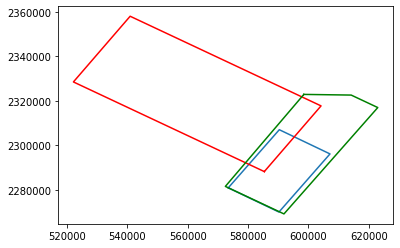

In [59]:
veldataxys={'X':vel_data_corners[:,2],'Y':vel_data_corners[:,3]}
veldataxys['X']=np.append(veldataxys['X'],veldataxys['X'][0])
veldataxys['Y']=np.append(veldataxys['Y'],veldataxys['Y'][0])
plt.plot(antel_bound['X'],antel_bound['Y'],'-'#,rel_bound['X'],rel_bound['Y'],'-'
         ,veldataxys['X'],veldataxys['Y'],'-r',proc_limits_bound['X'],proc_limits_bound['Y'],'-g')

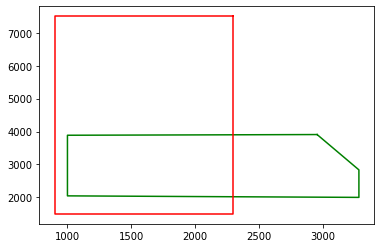

In [58]:
veldataxys={'X':vel_data_corners[:,0],'Y':vel_data_corners[:,1]}
veldataxys['X']=np.append(veldataxys['X'],veldataxys['X'][0])
veldataxys['Y']=np.append(veldataxys['Y'],veldataxys['Y'][0])
plt.plot(proc_limits_bound['IL'],proc_limits_bound['XL'],'-g',veldataxys['X'],veldataxys['Y'],'-r')